In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os

import arviz as az
import matplotlib.pyplot as plt
import neuromodels as nm
import numpy as np
import pandas as pd
import pylfi
import scipy.stats as stats
import seaborn as sns

[INFO] [2021.10.19 1:42:54 /Users/runner/miniforge3/conda-bld/nest-simulator_1633677025151/work/nestkernel/rng_manager.cpp:217 @ Network::create_rngs_] : Creating default RNGs
[INFO] [2021.10.19 1:42:54 /Users/runner/miniforge3/conda-bld/nest-simulator_1633677025151/work/nestkernel/rng_manager.cpp:260 @ Network::create_grng_] : Creating new default global RNG

              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: nest-2.20.2
 Built: Oct  8 2021 07:17:41

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
# Set plot style
sns.set(context="paper", style='darkgrid', rc={"axes.facecolor": "0.96"})

# Set fontsizes in figures
size = 10
tex_fonts = {
    #"text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern"],
    "axes.labelsize": size,
    "font.size": size,
    "legend.fontsize": size,
    "xtick.labelsize": size-1,
    "ytick.labelsize": size-1,
    'legend.handlelength': 2
}

plt.rcParams.update(tex_fonts)
#plt.rc('text', usetex=True)

# Set path to save the figures
FIGURE_PATH = "./../latex/figures" 

def fig_path(fig_id):
    """
    Input name of figure to load or save with extension as dtype str
    """
    return os.path.join(FIGURE_PATH + "/", fig_id)

# Set figure size
pt = 410 #360

def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

fs = set_size(pt, fraction=1)
print(fs)

(5.673170056731701, 3.5062119190183605)


### Normal prior predictive distribution

In [3]:
df = pd.read_csv('data/sum_stats_priorpred_normal.csv')
df

,gbarK,gbarNa,spike_rate,latency_to_first_spike,average_AP_overshoot,average_AHP_depth,average_AP_width,accommodation_index
0,34.484829,123.412764,0.07,2.200,32.273201,-63.573922,2.052761,-1.752846e-04
1,34.794108,118.868758,0.07,2.275,31.056730,-63.552643,2.020004,-3.424658e-04
2,35.799550,118.814307,0.07,2.200,30.489141,-63.600559,2.031832,-4.760755e-17
3,37.208242,123.463996,0.07,2.200,31.029868,-63.702125,2.080914,-1.662510e-04
4,34.360492,120.747888,0.07,2.275,31.723358,-63.546343,2.030232,-4.951517e-17
...,...,...,...,...,...,...,...,...
1876,36.399153,117.100923,0.07,2.250,29.506176,-63.611267,2.011942,2.314471e-17
1877,33.582504,120.861399,0.07,2.250,32.076602,-63.506205,2.041108,-1.765225e-04
1878,33.817171,116.880395,0.07,2.275,31.018210,-63.485140,1.990257,0.000000e+00
1879,35.544207,120.562167,0.07,2.100,31.130293,-63.603488,2.056242,-2.413434e-17


In [4]:
s_stats = ["spike_rate",
           "latency_to_first_spike",
           "average_AP_overshoot",
           "average_AHP_depth",
           "average_AP_width",
           "accommodation_index"]

weights = []

for stat in s_stats:
        
    r_gbarK = df["gbarK"].corr(df[stat], method='pearson')
    r2_gbarK = r_gbarK**2

    r_gbarNa = df["gbarNa"].corr(df[stat], method='pearson')
    r2_gbarNa = r_gbarNa**2

    weight = np.mean([r2_gbarK, r2_gbarNa]) 
    weights.append(weight)
    
df2 = pd.DataFrame(data=weights,
                   columns=["Weight"],
                   index=s_stats
                  )
df2

,Weight
spike_rate,0.189928
latency_to_first_spike,0.063333
average_AP_overshoot,0.417430
average_AHP_depth,0.074021
average_AP_width,0.151500
accommodation_index,0.008406


In [16]:
df3 = (df2["Weight"] / df2["Weight"].sum()).to_frame()
print("Sum of weights:", df3["Weight"].sum())
df3

Sum of weights: 1.0


,Weight
spike_rate,0.209954
latency_to_first_spike,0.070011
average_AP_overshoot,0.461443
average_AHP_depth,0.081825
average_AP_width,0.167474
accommodation_index,0.009292


In [ ]:
'''
1. average_AP_overshoot
2. spike_rate
3. average_AP_width
4. average_AHP_depth
5. latency_to_first_spike
6. accommodation_index
'''


s_stats = ["average_AP_overshoot",
           "spike_rate",
           "average_AP_width",
           "average_AHP_depth",
           "latency_to_first_spike",
           "accommodation_index"]


df = pd.read_csv('data/sumstat_weights_normal.csv', index_col=0)
print(df)

for i in range(len(s_stats)):
    sum_stats = s_stats[:i + 1]
    iweights = df.loc[sum_stats]["Weight"].to_numpy()
    iweights /= np.sum(iweights)
    print(sum_stats, iweights)

<AxesSubplot:xlabel='gbarK', ylabel='gbarNa'>

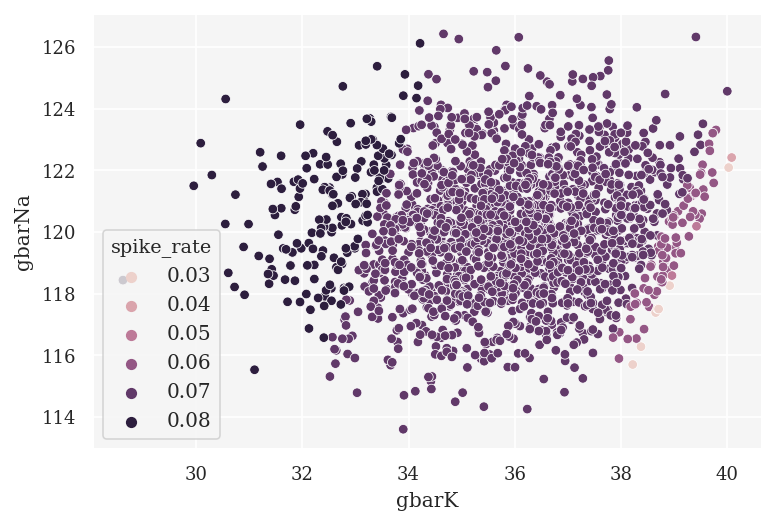

In [5]:
sns.scatterplot(data=df, x="gbarK", y="gbarNa", hue="spike_rate")

<AxesSubplot:xlabel='gbarK', ylabel='gbarNa'>

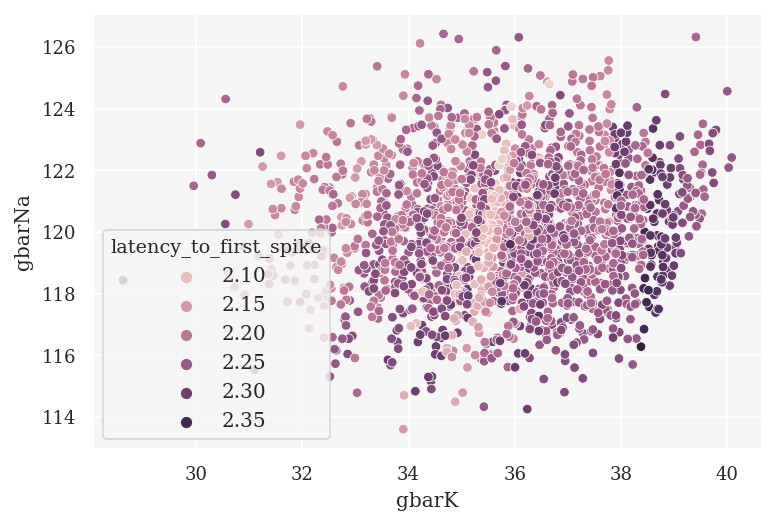

In [6]:
sns.scatterplot(data=df, x="gbarK", y="gbarNa", hue="latency_to_first_spike")

<AxesSubplot:xlabel='gbarK', ylabel='gbarNa'>

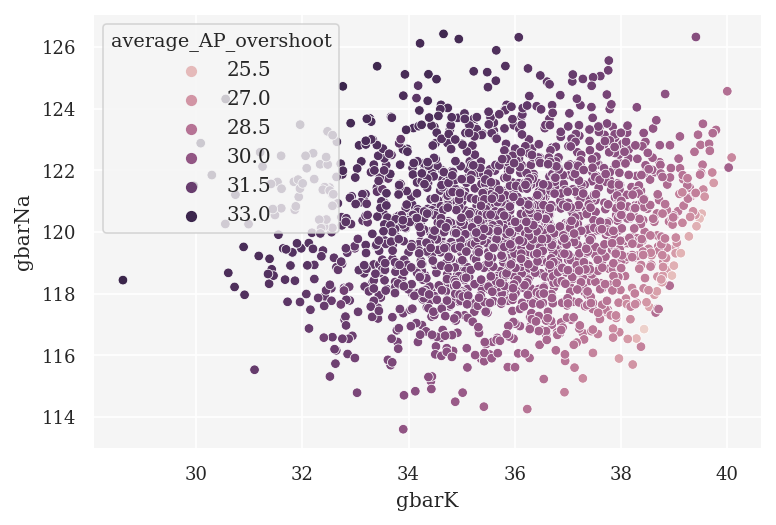

In [10]:
sns.scatterplot(data=df, x="gbarK", y="gbarNa", hue="average_AP_overshoot")

<AxesSubplot:xlabel='gbarK', ylabel='gbarNa'>

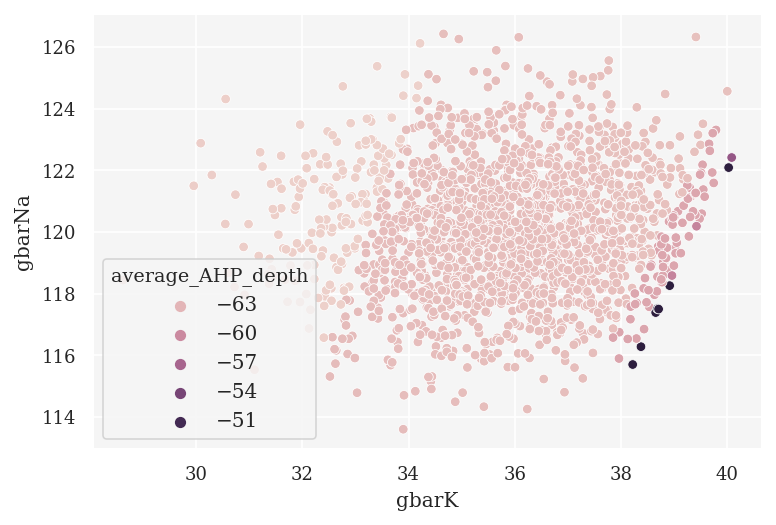

In [7]:
sns.scatterplot(data=df, x="gbarK", y="gbarNa", hue="average_AHP_depth")

<AxesSubplot:xlabel='gbarK', ylabel='gbarNa'>

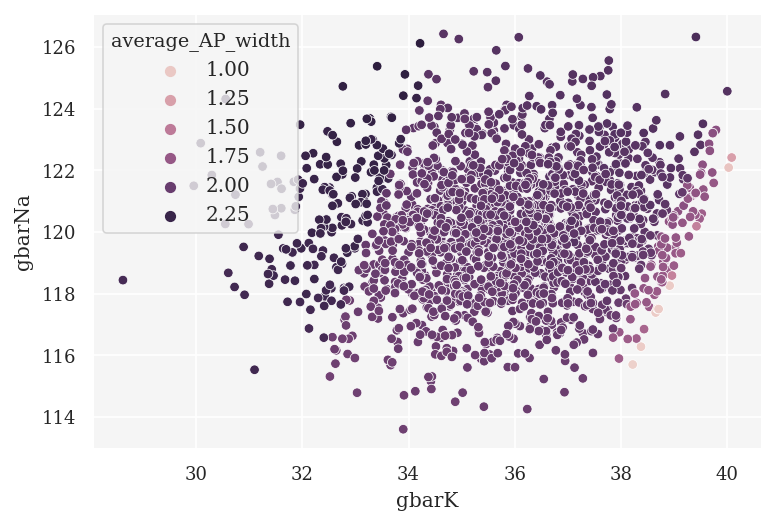

In [8]:
sns.scatterplot(data=df, x="gbarK", y="gbarNa", hue="average_AP_width")

<AxesSubplot:xlabel='gbarK', ylabel='gbarNa'>

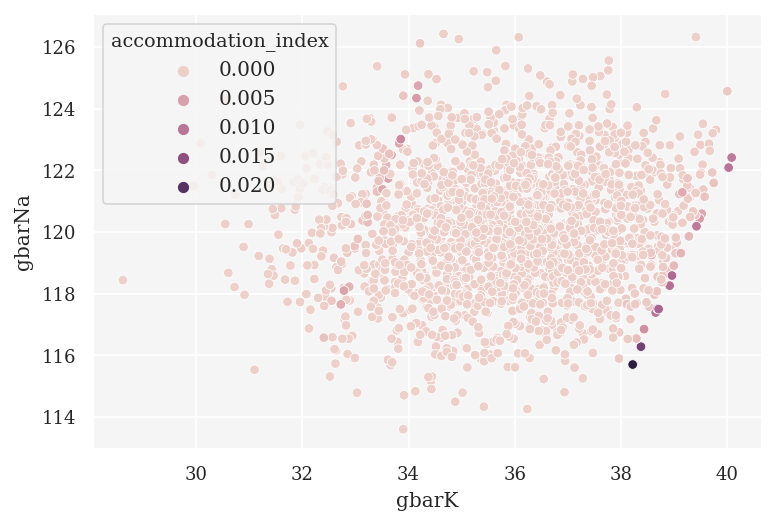

In [9]:
sns.scatterplot(data=df, x="gbarK", y="gbarNa", hue="accommodation_index")

## NEW

In [4]:
df = pd.read_csv('data/sum_stats_priorpred_uniform.csv')
df

,gbarK,gbarNa,spike_rate,latency_to_first_spike,average_AP_overshoot,average_AHP_depth,average_AP_width,accommodation_index
0,32.268361,118.669341,0.08,2.225,31.822761,-64.730002,2.237072,-6.366870e-17
1,38.098927,117.647811,0.07,2.250,27.467568,-63.678433,2.004527,7.581519e-04
2,35.920162,118.141721,0.07,2.225,30.215732,-63.599986,2.021033,-4.720616e-17
3,31.292726,118.173237,0.08,2.200,32.148281,-64.664764,2.206184,4.297055e-17
4,37.374905,123.609871,0.07,2.200,30.977557,-63.710430,2.085961,2.357056e-17
...,...,...,...,...,...,...,...,...
1698,38.027066,116.391864,0.06,2.275,27.013986,-61.896196,1.729283,1.853225e-04
1699,37.833848,118.878826,0.07,2.250,28.842247,-63.685257,2.048731,2.233197e-17
1700,31.781686,117.811990,0.08,2.225,31.899190,-64.692764,2.200463,0.000000e+00
1701,33.110798,121.279243,0.08,2.175,32.068596,-64.801465,2.252808,-1.484120e-04


In [25]:
df = pd.read_csv('data/sum_stats_priorpred_uniform.csv')
df = df.iloc[:len(df.index)//3]
df.rename(columns={"gbarK": r"$\bar{g}_\mathrm{K}$",
                 "gbarNa": r"$\bar{g}_\mathrm{Na}$",
                 "spike_rate": "Spike rate",
                 "latency to first spike": "Lat. to first spike",
                 "average_AP_overshoot": "Avg. AP overshoot",
                 "average_AHP_depth": "Avg. AHP depth",
                 "average_AP_width": "Avg. AP width", 
                 "accommodation_index" : "Accomm. index"
          },
 inplace=True
         )
df

,$\bar{g}_\mathrm{K}$,$\bar{g}_\mathrm{Na}$,Spike rate,latency_to_first_spike,Avg. AP overshoot,Avg. AHP depth,Avg. AP width,Accomm. index
0,32.268361,118.669341,0.08,2.225,31.822761,-64.730002,2.237072,-6.366870e-17
1,38.098927,117.647811,0.07,2.250,27.467568,-63.678433,2.004527,7.581519e-04
2,35.920162,118.141721,0.07,2.225,30.215732,-63.599986,2.021033,-4.720616e-17
3,31.292726,118.173237,0.08,2.200,32.148281,-64.664764,2.206184,4.297055e-17
4,37.374905,123.609871,0.07,2.200,30.977557,-63.710430,2.085961,2.357056e-17
...,...,...,...,...,...,...,...,...
562,35.123192,116.294386,0.07,2.150,30.138291,-63.545773,1.975043,2.384372e-17
563,35.415795,118.433657,0.07,2.125,30.600526,-63.578898,2.025892,-1.684920e-04
564,32.862112,124.275045,0.08,2.175,32.847815,-64.811249,2.277714,6.413056e-17
565,34.921802,119.773194,0.07,2.275,31.232203,-63.566613,2.041457,-1.716738e-04


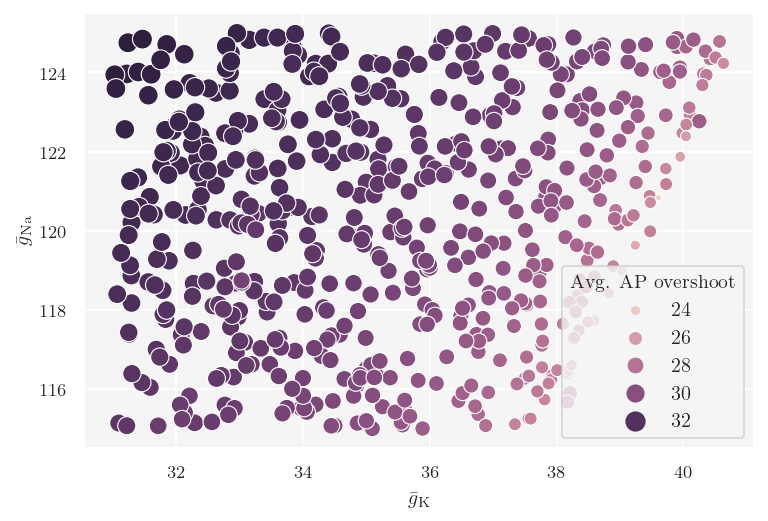

In [26]:
sns.scatterplot(data=df, 
                x=r"$\bar{g}_\mathrm{K}$", 
                y=r"$\bar{g}_\mathrm{Na}$", 
                hue="Avg. AP overshoot",
                size="Avg. AP overshoot",
                sizes=(10, 100)
               )
plt.show()

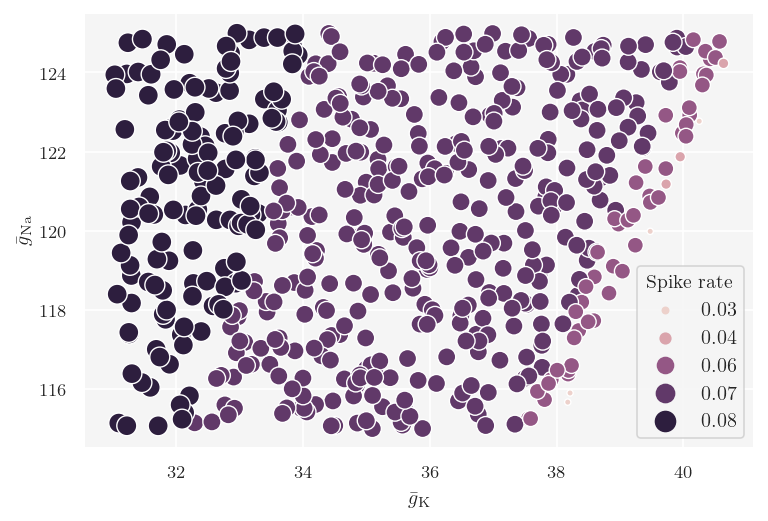

In [27]:
sns.scatterplot(data=df, 
                x=r"$\bar{g}_\mathrm{K}$", 
                y=r"$\bar{g}_\mathrm{Na}$", 
                hue="Spike rate",
                size="Spike rate",
                sizes=(10, 100)
               )
plt.show()